## **Exploratory Data Analysis for Machine Learning - Project**
This notebook is part of my project required by IBM Exploratory Data Analysis for Machine Learning course.

Data source: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

Notebook Contents: 

> 
>1. Dataset Description
> 2. Data Overview
> 3. Exploratory Data Analysis
> 4. Hypothesis Testing

### **1. Dataset Descriprtion**


Titanic - Machine Learning from Disaster train dataset contains records for 891 passanger who were on the Titinac when it sank. In this project I will clean data and explore relationship between sex, family and sibsp and survival.

### **2. Data Overview**

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
#Loading dataset
data = pd.read_csv('titanic/train.csv')

In [3]:
#First look into dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Examine column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()
data.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [6]:
#Examine missing data
data.isnull().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

### **3. Exploratory Data Analysis**

In this project we will look into how being male or female influence survival rate and weather having childern, sibling, spouse or parents with you influences survival rate.

In [7]:
#Copying original data
df = data.copy()
#Removing features that are not necessary for prediction and features that have a lot of missing data
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'Age','Pclass'])
df

,Survived,Sex,SibSp,Parch
0,0,male,1,0
1,1,female,1,0
2,1,female,0,0
3,1,female,1,0
4,0,male,0,0
...,...,...,...,...
886,0,male,0,0
887,1,female,0,0
888,0,female,1,2
889,1,male,0,0


In [8]:
#Shape of data
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])

Number of rows in the data: 891
Number of columns in the data: 4


Numeric features: ['Survived', 'SibSp', 'Parch']
Categorical features: ['Sex']


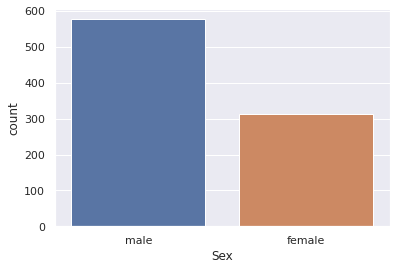

In [9]:
features = df.columns
Num_features = [feature for feature in features if df[feature].dtype != object]
print("Numeric features:",Num_features)
Cat_features = [feature for feature in features if df[feature].dtype == object]
print("Categorical features:",Cat_features)
#Count of males and females
countplot = sns.countplot(x="Sex",data=df)

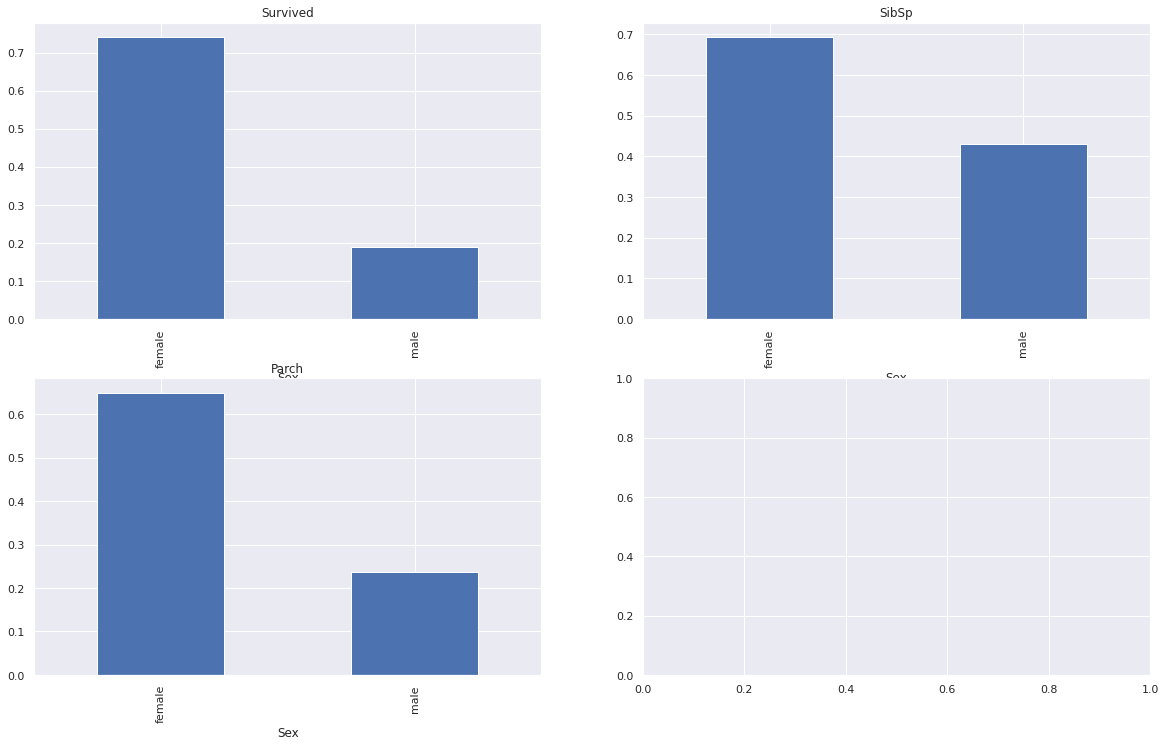

In [10]:
fix, axes = plt.subplots(2,2, figsize=(20,12))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(df[Num_features]):
    df_n = df.groupby('Sex')[c].mean()
    plot = df_n.plot(kind='bar',title=c,ax=axes[i])

In [11]:
#Transforming classification features into numeric values
mapping = {'male': 0, 'female': 1}
df_categorical = df.replace({'Sex': mapping})
female = df_categorical[(df_categorical['Sex'] != 0)]
male = df_categorical[(df_categorical['Sex'] == 0)]
male = male.drop(columns=['Sex'])
male_noChildern = male[(male['SibSp']>0)]
male_Childern = male[(male['SibSp'] == 0)]

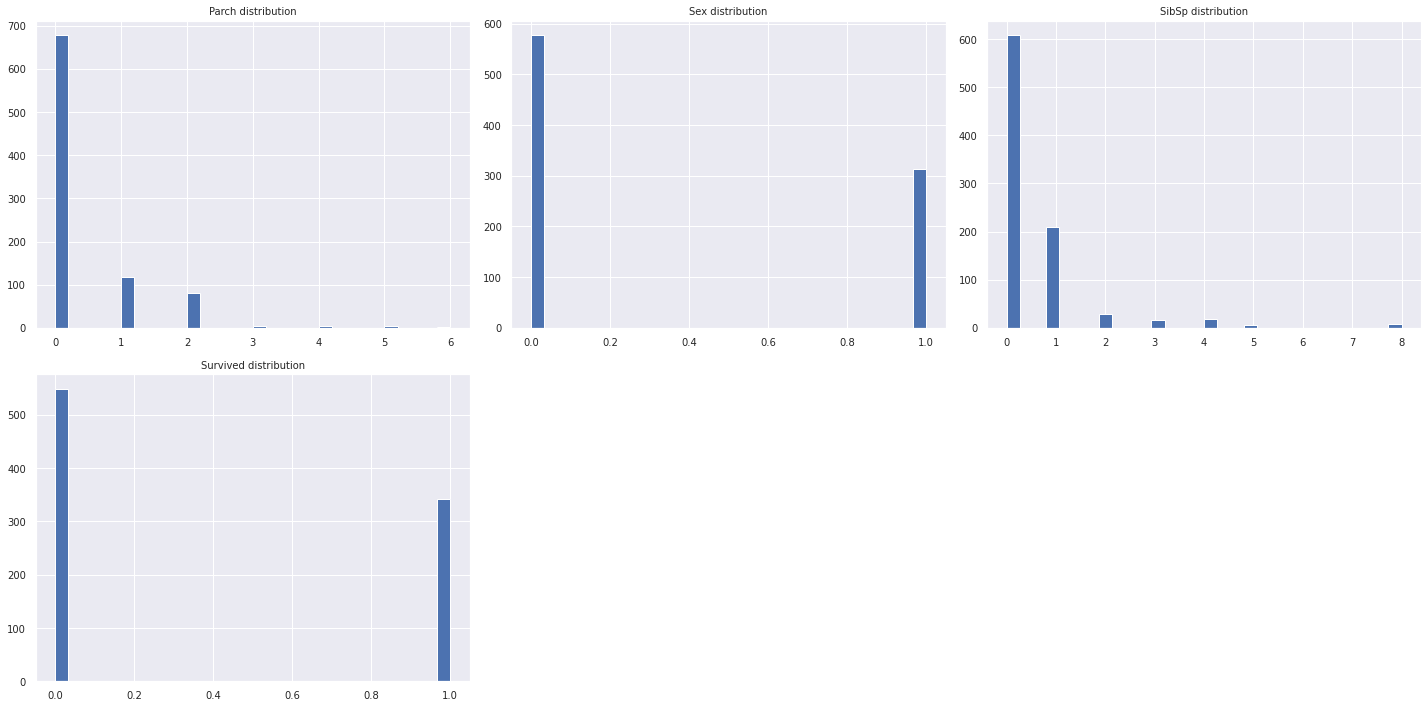

In [12]:
def hist_loop(data: pd.DataFrame,
              rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()
hist_loop(data=df_categorical,
          rows=2,
          cols=3,
          figsize=(20,10))

In [13]:
df_categorical.corr()

,Survived,Sex,SibSp,Parch
Survived,1.000000,0.543351,-0.035322,0.081629
Sex,0.543351,1.000000,0.114631,0.245489
SibSp,-0.035322,0.114631,1.000000,0.414838
Parch,0.081629,0.245489,0.414838,1.000000


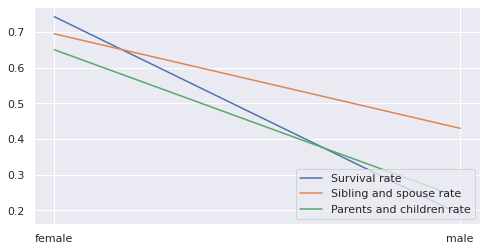

In [14]:
sex_survived = df.groupby('Sex')['Survived'].agg(['mean'])
sex_sibsp = data.groupby('Sex')['SibSp'].agg(['mean'])
sex_parch = data.groupby('Sex')['Parch'].agg(['mean'])
f = plt.figure(figsize=(8,4))
plt.plot(sex_survived, label='Survival rate')
plt.plot(sex_sibsp, label='Sibling and spouse rate')
plt.plot(sex_parch, label='Parents and children rate')
plt.legend(loc='lower right')

### **4.Hypothesis testing**
**Null Hypothesis**

Male have lower survival rate and having children, sibling, spouse or parents with you on ship significantly decreases survival rate.

**Alternative Hypothesis**

There is no relationship between male and female survival rate and having children, sibling, spouse or parents with them does not influence survival rate.

In [15]:
import scipy.stats as ss
import sklearn as skl
from scipy import stats

male_survived = male[male['Survived'] == 1]
male_dead = male[male['Survived'] == 0]

stats.shapiro(male_survived['SibSp'])
stats.shapiro(male_survived['Parch'])

stats.ttest_ind(male_survived['SibSp'], 
                male_dead['SibSp'], equal_var = False)

ss.kruskal(male_survived['SibSp'], male_dead['SibSp'])

KruskalResult(statistic=3.2374202372457375, pvalue=0.07197388527273343)

In [16]:
female_survived = female[female['Survived'] == 1]
female_dead = female[female['Survived'] == 0]

stats.shapiro(female_survived['SibSp'])
stats.shapiro(female_survived['Parch'])

stats.ttest_ind(female_survived['SibSp'], 
                female_dead['SibSp'], equal_var = False)

ss.kruskal(female_survived['SibSp'], female_dead['SibSp'])

KruskalResult(statistic=8.533764294117693, pvalue=0.003486179336402264)

In [17]:
ss.kruskal(male_dead['SibSp'], female_dead['SibSp'])
ss.kruskal(male_survived['SibSp'], female_survived['SibSp'])

KruskalResult(statistic=2.4242226489487697, pvalue=0.11947249452560628)

In [18]:
ss.kruskal(male_dead['Parch'], female_dead['Parch'])
ss.kruskal(male_survived['Parch'], female_survived['Parch'])

KruskalResult(statistic=2.4435813598496208, pvalue=0.11800652886291178)